In [19]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [20]:
sns.set()
sns.set_theme(
    style='whitegrid',
    palette='colorblind'
)
# themes are listed at: https://seaborn.pydata.org/tutorial/aesthetics.html
# palettes are listed at: https://seaborn.pydata.org/tutorial/color_palettes.html

In [21]:
region_data = pd.read_csv("WID_Data_regions\WID_Data_Metadata\WID_Data_02012024-235418.csv", sep = ";")

In [22]:
region_data

,Percentile,Year,sptinc_z_QB Pre-tax national income Top 10% | share Africa,sptinc_z_QD Pre-tax national income Top 10% | share Asia,sptinc_z_XL Pre-tax national income Top 10% | share Latin America,sptinc_z_QE Pre-tax national income Top 10% | share Europe,sptinc_z_XM Pre-tax national income Top 10% | share Middle East,sptinc_z_QF Pre-tax national income Top 10% | share Oceania,sptinc_z_QP Pre-tax national income Top 10% | share North America
0,p90p100,1820,NaN,NaN,0.5405,0.4845,NaN,0.4429,0.4221
1,p90p100,1821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,p90p100,1822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,p90p100,1823,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,p90p100,1824,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
604,p99p100,2018,0.1999,0.1921,0.2292,0.1240,0.2274,0.1106,0.1920
605,p99p100,2019,0.1973,0.1873,0.2258,0.1232,0.2223,0.1133,0.1901
606,p99p100,2020,0.1966,0.1932,0.2293,0.1240,0.2244,0.1219,0.1785
607,p99p100,2021,0.1984,0.1925,0.2214,0.1138,0.2190,0.1133,0.1901


In [23]:
region_data['Percentile'].unique()

array(['p90p100', 'p0p50', 'p99p100'], dtype=object)

In [24]:
region_data.columns

Index(['Percentile', 'Year',
       'sptinc_z_QB Pre-tax national income Top 10% | share Africa',
       'sptinc_z_QD Pre-tax national income Top 10% | share Asia',
       'sptinc_z_XL Pre-tax national income Top 10% | share Latin America',
       'sptinc_z_QE Pre-tax national income Top 10% | share Europe',
       'sptinc_z_XM Pre-tax national income Top 10% | share Middle East',
       'sptinc_z_QF Pre-tax national income Top 10% | share Oceania',
       'sptinc_z_QP Pre-tax national income Top 10% | share North America'],
      dtype='object')

In [30]:
region_data= region_data.rename(columns={
    'sptinc_z_QB Pre-tax national income Top 10% | share Africa': 'Africa',
    'sptinc_z_QD Pre-tax national income Top 10% | share Asia': 'Asia',
    'sptinc_z_XL Pre-tax national income Top 10% | share Latin America': 'Latin America',
    'sptinc_z_QE Pre-tax national income Top 10% | share Europe': 'Europe',
    'sptinc_z_XM Pre-tax national income Top 10% | share Middle East': 'Middle East',
    'sptinc_z_QF Pre-tax national income Top 10% | share Oceania': 'Oceania',
    'sptinc_z_QP Pre-tax national income Top 10% | share North America': 'North America'
})

In [31]:
pd.to_datetime(region_data['Year'])

0     1970-01-01 00:00:00.000001820
1     1970-01-01 00:00:00.000001821
2     1970-01-01 00:00:00.000001822
3     1970-01-01 00:00:00.000001823
4     1970-01-01 00:00:00.000001824
                   ...             
604   1970-01-01 00:00:00.000002018
605   1970-01-01 00:00:00.000002019
606   1970-01-01 00:00:00.000002020
607   1970-01-01 00:00:00.000002021
608   1970-01-01 00:00:00.000002022
Name: Year, Length: 609, dtype: datetime64[ns]

<Axes: title={'center': 'Share of National Income in Major Regions \nOwned by Different Percentile Groups'}, xlabel='Year', ylabel='Share of National Income Owned by Percentile group (%)'>

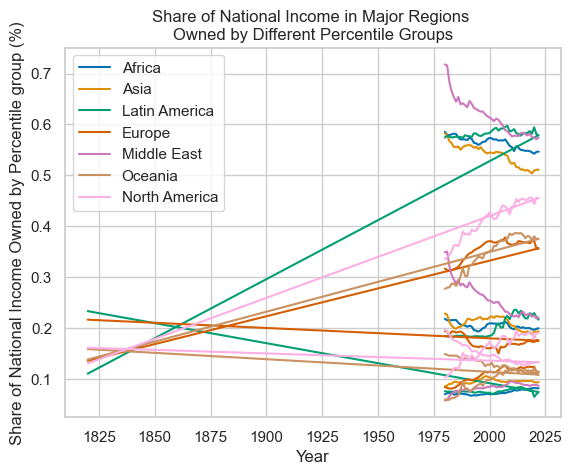

In [33]:
region_data.set_index('Year').plot(
    title='Share of National Income in Major Regions \nOwned by Different Percentile Groups',
    xlabel='Year',
    ylabel='Share of National Income Owned by Percentile group (%)'
)

Percentile
p0p50      Axes(0.125,0.11;0.775x0.77)
p90p100    Axes(0.125,0.11;0.775x0.77)
p99p100    Axes(0.125,0.11;0.775x0.77)
dtype: object

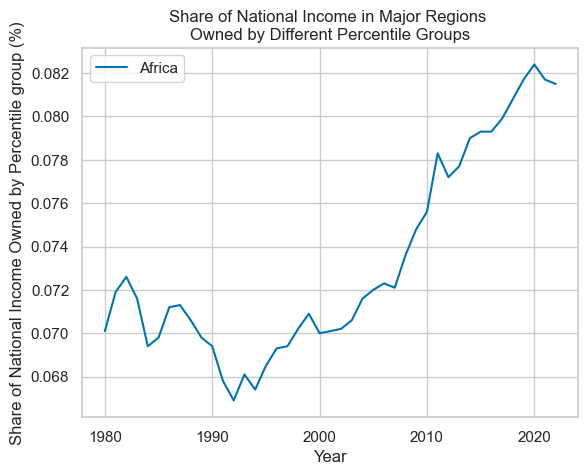

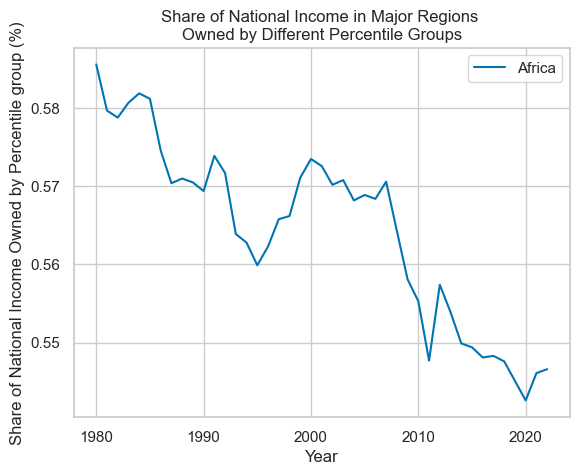

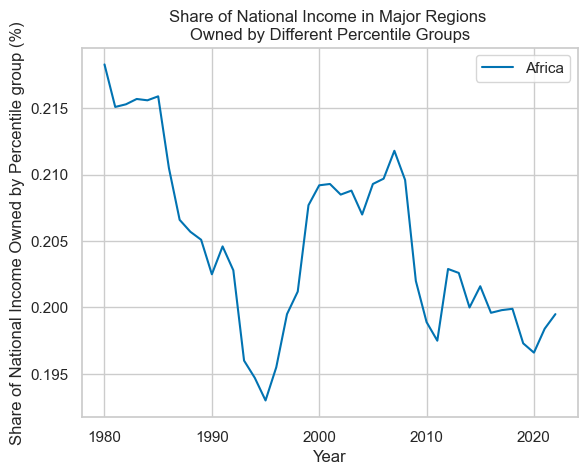

In [39]:
# That was not ideal. Let's start from 1980, when the data is better, and go region by region.

# Africa
region_data \
    .loc[region_data['Year'] > 1979]\
    [['Year', 'Percentile', 'Africa']]\
    .set_index('Year')\
    .groupby(['Percentile'])\
    .plot(
        title='Share of National Income in Major Regions \nOwned by Different Percentile Groups',
        xlabel='Year',
        ylabel='Share of National Income Owned by Percentile group (%)'
    )

In [ ]:
# Now let's get these all onto the same chart

# Create a new data frame with unique years in one column
africa_inequality_since_1980 = region_data \
    .loc[region_data['Year'] > 1979]\
    ['Year']\
    .unique()


array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

In [ ]:
africa_bottom_50_percent_income_share = region_data \
    .loc[(region_data['Year'] > 1979) & (region_data['Percentile'] == 'p0p50')]\
    [['Year', 'Africa']]
# Strangely, Pandas uses '&' here rather than 'and'.

africa_top_10_percent_income_share = region_data \
    .loc[(region_data['Year'] > 1979) & (region_data['Percentile'] == 'p90p100')]\
    [['Year', 'Africa']]

africa_top_1_percent_income_share = region_data \
    .loc[(region_data['Year'] > 1979) & (region_data['Percentile'] == 'p99p100')]\
    [['Year', 'Africa']]

In [ ]:
africa_top_10_percent_income_share.head()

,Year,Africa
160,1980,0.5856
161,1981,0.5797
162,1982,0.5788
163,1983,0.5807
164,1984,0.5819


<Axes: title={'center': 'Estimated Share of National Income Owned by Percentile Group Across Africa'}, xlabel='Year', ylabel='Percentage of National Income (%)'>

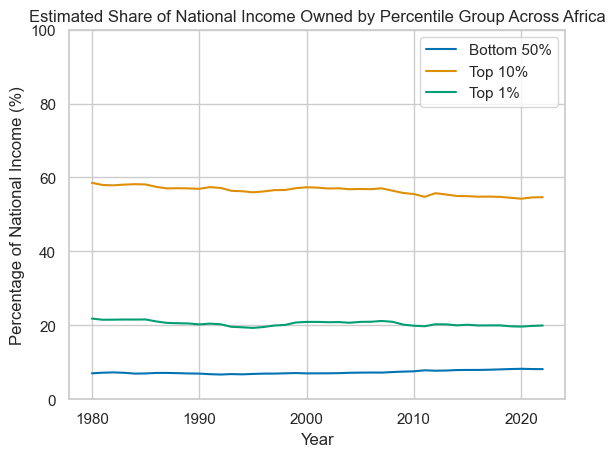

In [ ]:
from functools import reduce

reduce(lambda df1, df2: pd.merge(df1, df2, on='Year', how='outer'), \
       [
           africa_bottom_50_percent_income_share, 
           africa_top_10_percent_income_share,
           africa_top_1_percent_income_share
       ])\
       .rename(
           columns={
               'Africa_x': 'Bottom 50%',
               'Africa_y': 'Top 10%',
               'Africa': 'Top 1%'
           }
       )\
       .set_index('Year')\
       .multiply(100)\
       .plot(
           title='Estimated Share of National Income Owned by Percentile Group Across Africa',
           xlabel='Year',
           ylabel='Percentage of National Income (%)',
           ylim=(0, 100)
       )

In [ ]:
# Doing this manually for each region would result in a lot of code.
# Instead, let's create a list of functions which will do this for me.

percentile_group_renaming_dict = {
    'p0p50': 'Bottom 50 percent',
    'p90p100': 'Top 10 percent',
    'p99p100': 'Top 1 percent'
}

# plot_timeseries_for_regional_percentile_groups 
def plot_inequality_timeseries_for_area_percentie_groups(dataframe_with_all_data, name_of_area, percentile_groups, start_date, end_date):
    list_of_data_by_area_and_percentile_group = []

    for pg in percentile_groups:
        list_of_data_by_area_and_percentile_group\
            .append(
                dataframe_with_all_data\
                .loc[
                    (start_date <= region_data['Year']) & 
                    (region_data['Year'] <= end_date) & 
                    (region_data['Percentile'] == pg)
                ]\
                [['Year', name_of_area]]\
                .rename(columns={
                    name_of_area: percentile_group_renaming_dict[pg]
                })
            )

    combined_df = combine_dataframes_based_on_column(list_of_data_by_area_and_percentile_group, 'Year')
    combined_df = combined_df.multiply(100) # the multiply() method returns a new function.

    combined_df\
       .plot(
           title='Estimated Share of National Income Owned by Percentile Group Across ' + name_of_area,
           xlabel='Year',
           ylabel='Percentage of National Income (%)',
           ylim=(0, 100)
       )
    
def combine_dataframes_based_on_column(list_of_dfs, column_name):
    return reduce(lambda df1, df2: pd.merge(df1, df2, on=column_name, how='outer'), \
       list_of_dfs)\
       .set_index(column_name)


In [44]:
basic_percentile_groups = ['p0p50', 'p90p100', 'p99p100']

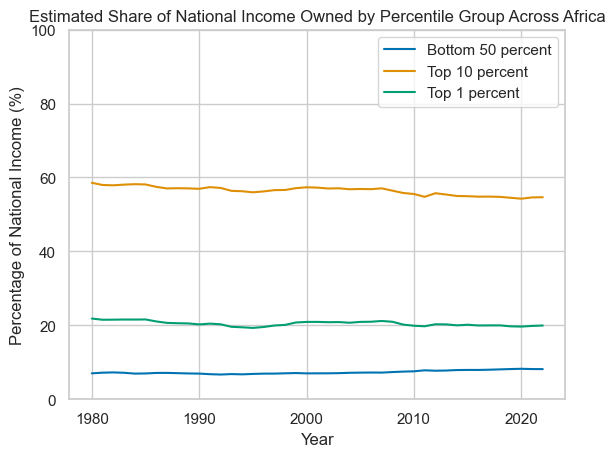

In [ ]:
plot_inequality_timeseries_for_area_percentie_groups(
    region_data,
    'Africa',
    basic_percentile_groups,
    1980,
    region_data['Year'].unique().max()
)

In [46]:
# All with type-hinting

from functools import reduce

def load_csv_as_df(path_to_csv: str, seperator: str, rows_to_skip: list) -> pd.DataFrame:
    return pd.read_csv(path_to_csv, sep = seperator, skiprows = rows_to_skip)

region_data= region_data.rename(columns={
    'sptinc_z_QB\nPre-tax national income \nTop 10% | share\nAfrica': 'Africa',
    'sptinc_z_QD\nPre-tax national income \nTop 10% | share\nAsia': 'Asia',
    'sptinc_z_XL\nPre-tax national income \nTop 10% | share\nLatin America': 'Latin America',
    'sptinc_z_QE\nPre-tax national income \nTop 10% | share\nEurope': 'Europe',
    'sptinc_z_XM\nPre-tax national income \nTop 10% | share\nMiddle East': 'Middle East',
    'sptinc_z_QF\nPre-tax national income \nTop 10% | share\nOceania': 'Oceania',
    'sptinc_z_QP\nPre-tax national income \nTop 10% | share\nNorth America': 'North America'
})

pd.to_datetime(region_data['Year'])

# Doign this manually for each region would result in a lot of code.
# Instead, let's create a list of functions which will do this for me.

percentile_group_renaming_dict: dict[str, str] = {
    'p0p50': 'Bottom 50 percent',
    'p90p100': 'Top 10 percent',
    'p99p100': 'Top 1 percent'
}

# plot_timeseries_for_regional_percentile_groups 
def plot_inequality_timeseries_for_area_percentie_groups(
        dataframe_with_all_data: pd.DataFrame, 
        name_of_area: str, 
        percentile_groups: list[str], 
        start_date: int, 
        end_date: int) -> ():
    list_of_data_by_area_and_percentile_group: list[pd.DataFrame] = []

    for pg in percentile_groups:
        list_of_data_by_area_and_percentile_group\
            .append(
                dataframe_with_all_data\
                .loc[
                    (start_date <= region_data['Year']) & 
                    (region_data['Year'] <= end_date) & 
                    (region_data['Percentile'] == pg)
                ]\
                [['Year', name_of_area]]\
                .rename(columns={
                    name_of_area: percentile_group_renaming_dict[pg]
                })
            )

    combined_df = combine_dataframes_based_on_column(list_of_data_by_area_and_percentile_group, 'Year')
    combined_df = combined_df.multiply(100) # the multiply() method returns a new function.

    plot_inequality_data(
        combined_df, 
        'Estimated Share of National Income \nOwned by Percentile Group Across ' + name_of_area,
        'Year',
        'Percentage of National Income (%)'
       )
    
def combine_dataframes_based_on_column(list_of_dfs: list[pd.DataFrame], column_name: str) -> pd.DataFrame:
    return reduce(lambda df1, df2: pd.merge(df1, df2, on=column_name, how='outer'), \
       list_of_dfs)\
       .set_index(column_name)

def plot_inequality_data(dataframe: pd.DataFrame, title: str, x_axis_label: str, y_axis_label: str) -> ():
    dataframe\
       .plot(
           title = title,
           xlabel = x_axis_label,
           ylabel = y_axis_label,
           ylim = (0, 100)
       )

In [42]:
list_of_regions: list[str] = [
    'Africa',
    'Asia',
    'Latin America',
    'Europe',
    'Middle East',
    'Oceania',
    'North America'
]

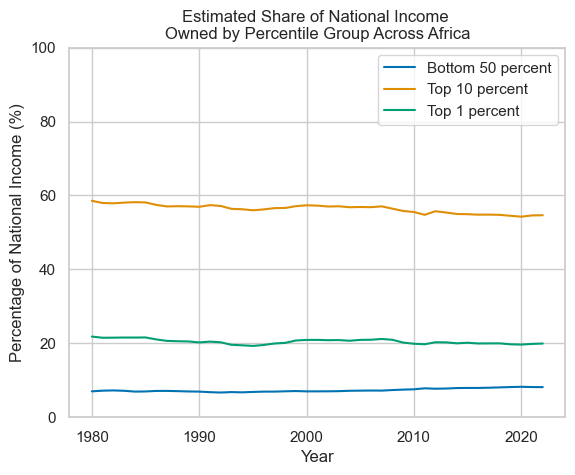

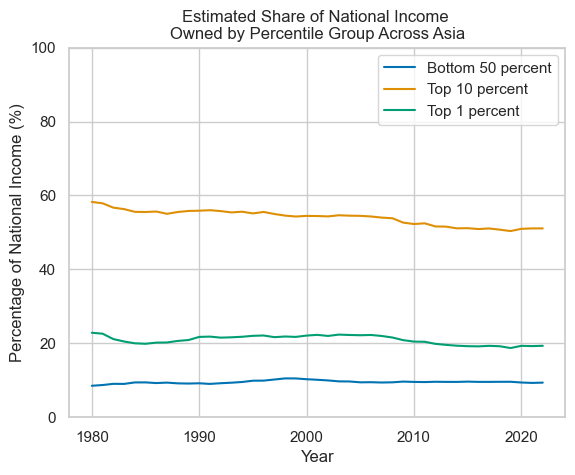

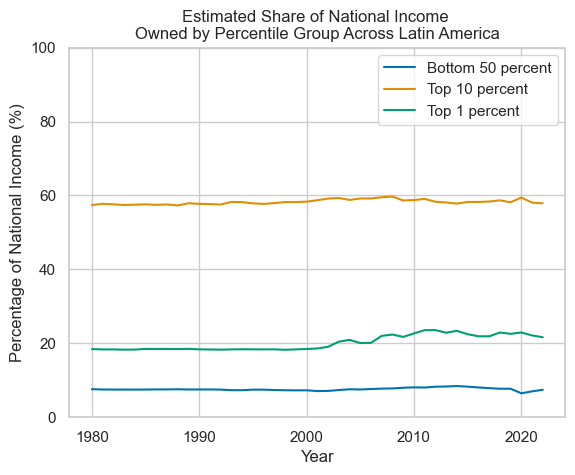

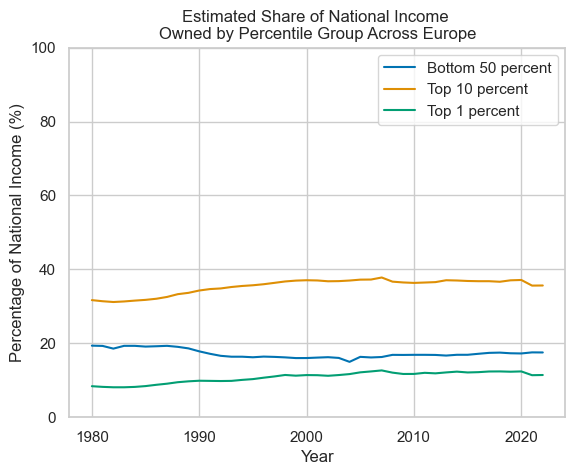

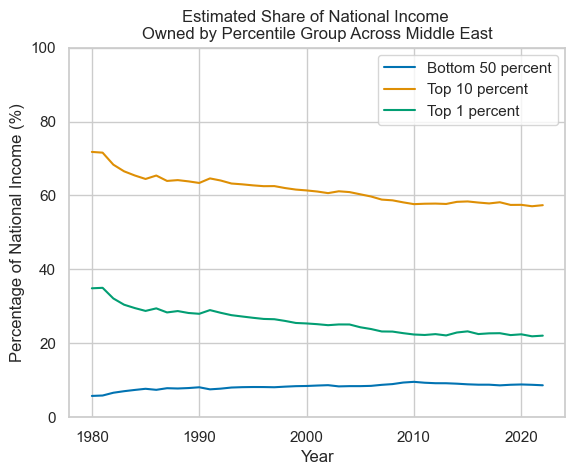

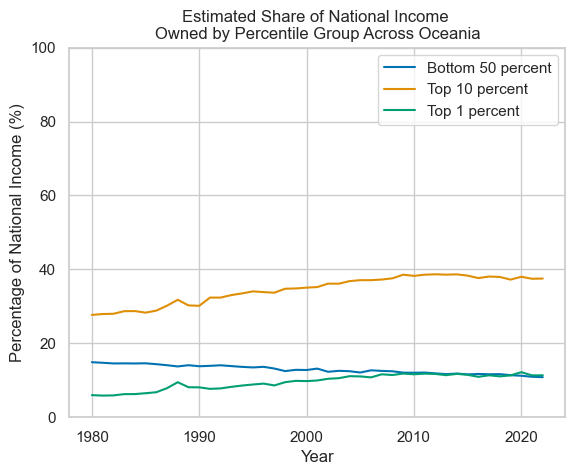

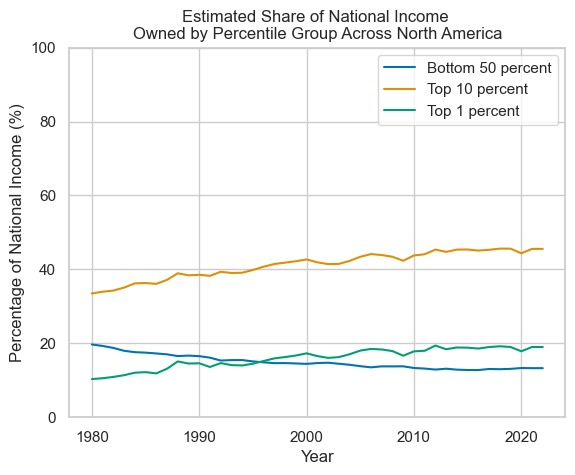

In [47]:
for r in list_of_regions:
    plot_inequality_timeseries_for_area_percentie_groups(
        region_data,
        r,
        basic_percentile_groups,
        1980,
        region_data['Year'].unique().max()
    )